In [1]:
from Data_Loader import Data_Loader
from Pipeline import Pipeline, Process

import Processes
import Filters
import Visualization

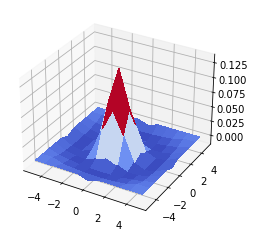

100%|██████████████████████████████████████████| 90/90 [00:00<00:00, 789.44it/s]


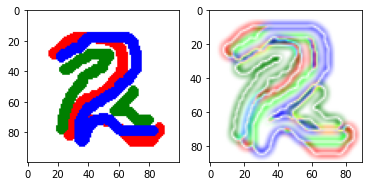

100%|███████████████████████████████████████| 2230/2230 [00:55<00:00, 40.24it/s]


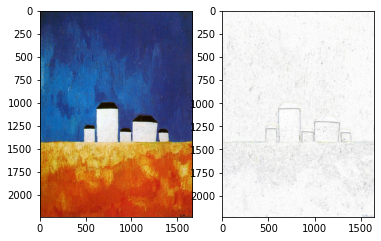

In [2]:
input_path = 'data'
output_path = 'output'

F = Filters.Make_Difference_of_Gaussian()
Visualization.Filter_Visualization(F)

dl = Data_Loader(input_path, output_path)
pipe = Pipeline([Processes.Filter(-F, parallel_method='row', workers=8), 
                 Processes.Normalize_Image(), 
                 Processes.Reverse_Image()])

for i, image in enumerate(dl):
    res = pipe.process(image)
    dl.write(i,res)
    Visualization.Image_Result_Comparison(image, res)